In [21]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import skimage as sk

## Project Title: The Individually Sinking Cell and Its Role in the Biological Pump

### Background & Motivation:
     The ocean’s biological pump ultimately determines how much carbon dioxide(CO2) gas
     the ocean is able to take-up in surface waters and export to deep waters where it
     can be isolated from the atmosphere on timescales of hundreds to thousands of years
     (Volk and Hoffert, 1985). The result of this sequestering of carbon is that CO2 gas
     concentrations in the atmosphere are lowered, which tempers the warming of our
     planet (Kiørboe, 2017; Alldredge and Silver, 1988 ).

    The largest export pathway in the biological C pump takes the form of sinking
    detrital particles-- particulate organic carbon (POC)--which includes the carcasses
    of tiny protists and animals. Despite decades of research, POC flux in the
    mesopelagic has been particularly difficult for oceanographers to parameterize.
    Challenges arise from the myriad physical and ecological interactions which determine
    the fate of POC as it travels through the mid-ocean.
    
    One often overlooked POC pathway is that of individually sinking cells, the
    prevailing assumption being that they are too small to sink very deeply before being
    consumed or remineralized. Nevertheless, these individual cells have appeared in
    sediment traps of both past and present studies (Durkin et al. 2015; Wiedmann et al.
    2014; Bodel et al. unpublished), and because of this, clearly merit further 
    investigation.

 
	This study aims to quantify the export flux of individual cells sinking through the
    mid-ocean and assess the relative importance of this pathway. Models of the 
    biological pump which exclude individual cells may be underestimating the amount of 
    carbon reaching sequestration depths. This project also links the taxonomic 
    identities of sinking cells to specific attenuation patterns and quantities of POC 
    flux, as both the sinking particle type as well as the organisms responsible for that
    export ultimately determine the magnitude and efficiency of the biological pump 
    (Eppley and Peterson, 1979; Ducklow et al., 2001).
    
    

<IPython.core.display.Javascript object>


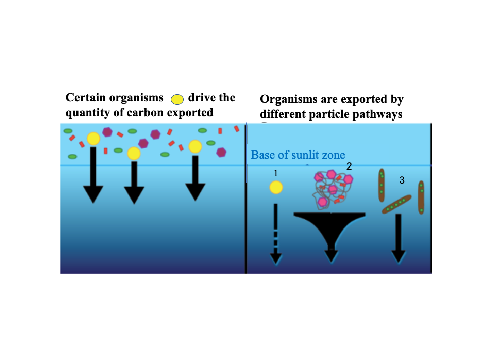

(-0.5, 721.5, 359.5, -0.5)

In [22]:
ex_pathways=sk.io.imread('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/EXPORTS_1_Teaching_Diagrams.png')
plt.figure()
plt.imshow(ex_pathways)
plt.axis('Off')

###### Figure 1. Certain organisms control the export of  carbon (black arrows) out of the sunlit zone and into the mid ocean. Organisms are transported by different particle pathways( 1 Individual cells, 2 aggregates, 3 fecal pellets), which control their fate in the mid-ocean (varying black arrows). Diagram © 2018 Colleen Durkin

###### Sample Collection
    In order to investigate the export flux of individual cells, we collected samples as
    part of the EXPORTS 2018 cruise to the North Pacific. We collected sinking particles
    at five depth levels ranging from the base of the euphotic zone (at 95m) through the 
    upper mesopelagic (at about 500 m).
    
    Two sediment trap platforms types (neutrally bouyant and surface tethered) were 
    deployed at one time, drifting at the same depths about 2km apart which allowed us to
    have replicate traps collecting at the same level. Traps were deployed 3 times over 
    the course of one month, referred to as Epochs 1,2 & 3 and during each deployment, 
    traps were out collecting sinking particles for between 3 and 5 days. Every trap 
    platform carried a polyacrylamide gel trap(gels) which gave us a total of 30 gel 
    samples collected over the month-long period.
        
###### Cell Enumeration and Imaging: 
    Once retrieved, subsamples of gels were manually scanned via light microscopy at 115x
    as well as photographed. The entire gel was also scanned at 25x and 7x so as not to 
    miss larger and more rare cells. Individual cells (i.e.: not incorporated into 
    aggregates or fecal pellets) were identified, categorized and counted. 


<IPython.core.display.Javascript object>


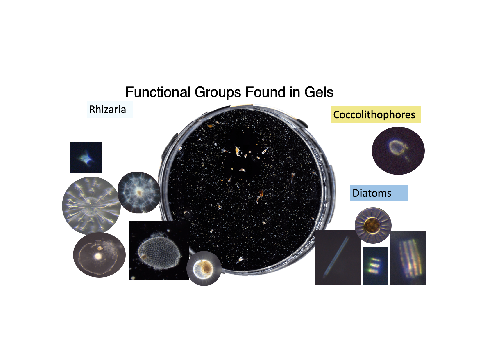

(-0.5, 1279.5, 719.5, -0.5)

In [23]:
cells_in_gels=sk.io.imread('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/cells_in_gels.png')
plt.figure()
plt.imshow(cells_in_gels)
plt.axis('Off')

###### Figure 2. Functional Groups Found in Gels. Micrographs of main taxonomic groups of organisms found as sinking solo cells in gel traps. 

© Unpublished 2020 A. Bodel

# Data Exploration, Analysis & Interpretations part 1

In [36]:
dfA= pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_gel_cell_cnt_grids_Jan_10.csv')
#
combined_df=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_Gel_115x_25x_7x.csv')
unc_combined_df=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/raw_data/EXPORTS_Gel_115x_25x_7x_Uncertainties.csv')

dfT=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/functional_group_fluxes.csv')
#
dfP=pd.read_csv('/Users/alb/PROJECTS/EXPORTS/Data_Analysis_Final_Project/MS263_Final_Project_AB/processed_data/From_colleen_All_EXPORTS_flux_summmed_by_Trap_csv.csv')
                

## Converting Raw Cell Counts into Cell Fluxes
Script Tasks: 
-Isolate dfs metadata; create variables to easily access for flux calculations and plotting

-Remove data from taxa which won't be used in this analysis

In [37]:
combined_df_numbers_step=combined_df.drop(['Unnamed: 0','group','Infrakingdom','group1','Phylum','Class','Subphylum','Order','Order_Suborder','Family','Category'],axis=1).astype('float')
combined_df_numbers_step.index=combined_df['Category']
combined_df_numbers=combined_df_numbers_step.drop(['Unnamed: 0.1'],axis=1)

In [38]:
Acell_counts_and_type = dfA.loc[dfA.group != 'metadata']
Acell_counts = Acell_counts_and_type.drop(['group','group.1','Category'],axis=1)
Acell_counts=Acell_counts.astype(float)
Ametadata = dfA.loc[dfA.group == 'metadata']
Ametadata_numbers = Ametadata.drop(['group','group.1','Category'],axis=1) #columns
Am2perfield=Ametadata_numbers.loc[Ametadata.Category=='m2perfield']
Am2perfield=Am2perfield.astype('float') #ensure that all is read as float
Adays=Ametadata_numbers.loc[Ametadata.Category=='Elapsed_Time_(days)'] #look in metadata_numbers where Elapsed_Time_(days)'
Adays=Adays.loc[2].astype(float)#days values are in row location 2 
Acells_per_m2=Acell_counts.divide(Am2perfield.loc[1])
Acell_flux=Acells_per_m2.divide(Adays)
Acell_flux_wlabels=Acell_flux.copy()

depth=Ametadata.loc[Ametadata.Category=='True_Depth_(m)']
A_flux_sum=combined_df.sum(axis=0)
Epochs=Ametadata.loc[Ametadata.Category=='Epoch']
Epoch_1=np.where(Epochs=='1')
Epoch_2=np.where(Epochs=='2')
Epoch_3=np.where(Epochs=='3')
E1_traps=Epochs.columns[Epoch_1[1]]
E2_traps=Epochs.columns[Epoch_2[1]]
E3_traps=Epochs.columns[Epoch_3[1]]
E1_traps=Epochs.columns[Epoch_1[1]]
E2_traps=Epochs.columns[Epoch_2[1]]
E3_traps=Epochs.columns[Epoch_3[1]]
E1_flux=A_flux_sum[E1_traps].astype(float).values
E2_flux=A_flux_sum[E2_traps].astype(float).values
E3_flux=A_flux_sum[E3_traps].astype(float).values
E1_depths=depth[E1_traps].astype(float).values[0]
E2_depths=depth[E2_traps].astype(float).values[0]
E3_depths=depth[E3_traps].astype(float).values[0]
#
Acell_counts_and_type = dfA.loc[dfA.group != 'metadata']
Acell_counts = Acell_counts_and_type.drop(['group','group.1','Category'],axis=1)
Acell_counts=Acell_counts.astype(float)
Ametadata = dfA.loc[dfA.group == 'metadata']
Ametadata_numbers = Ametadata.drop(['group','group.1','Category'],axis=1)
Am2perfield=Ametadata_numbers.loc[Ametadata.Category=='m2perfield']

## Depth Profile Variables For Total cell Flux
### Averages taken  for traps at replicate depths


In [39]:
#VARIABLES FOR PLOTTING TRUE FLUX Average values for replicate depths,
#Epochs distinct
E1_100_avg=((A_flux_sum.loc['RR1']+A_flux_sum.loc['RR6']+A_flux_sum.loc['RR7'])/3)
E1_150_avg=A_flux_sum.loc['RR8']
E1_200_avg=((A_flux_sum.loc['RR9']+A_flux_sum.loc['RR10'])/2)
E1_330_avg=((A_flux_sum.loc['RR4']+A_flux_sum.loc['RR11'])/2)
E1_500=A_flux_sum.loc['RR5']
#
E2_100_avg=((A_flux_sum.loc['RR23']+A_flux_sum.loc['RR28']+A_flux_sum.loc['RR29'])/3)
E2_150_avg=((A_flux_sum.loc['RR30']+A_flux_sum.loc['RR24'])/2)
E2_200_avg=((A_flux_sum.loc['RR25']+A_flux_sum.loc['RR31']+A_flux_sum.loc['RR32'])/3)
E2_330_avg=((A_flux_sum.loc['RR33']+A_flux_sum.loc['RR26'])/2)
E2_500=A_flux_sum.loc['RR27']
#
E3_100_avg=((A_flux_sum.loc['RR53']+A_flux_sum.loc['RR54']+A_flux_sum.loc['RR58'])/3)
E3_150_avg=((A_flux_sum.loc['RR55']+A_flux_sum.loc['RR59'])/2)
E3_200_avg=((A_flux_sum.loc['RR56']+A_flux_sum.loc['RR60']/2))
E3_330_avg=((A_flux_sum.loc['RR57']+A_flux_sum.loc['RR61'])/2)
E3_500=A_flux_sum.loc['RR62']
###
depth_bins=[E1_depths[0],E1_depths[5],E1_depths[6],E1_depths[1],E1_depths[2]]
df_avgE1=[E1_100_avg,E1_150_avg,E1_200_avg,E1_330_avg,E1_500]
df_avgE2=[E2_100_avg,E2_150_avg,E2_200_avg,E2_330_avg,E2_500]
df_avgE3=[E3_100_avg, E3_150_avg,E3_200_avg,E3_330_avg,E3_500]


E1df=combined_df_numbers[E1_traps]#Normalizing to Max value
E2df=combined_df_numbers[E2_traps]
E3df=combined_df_numbers[E3_traps]

## Depth Profile Variables For High Percent Taxa
##### Examining data subset that includes only the organisms which were most often present across all gel samples (high percent presence taxa)

In [40]:

E1percent_presence=np.sum(E1df>0,axis=1)/E1df.count(axis=1)
selectE1df=E1df.loc[E1percent_presence>.6]#20 by 9

E2percent_presence=np.sum(E2df>0,axis=1)/E2df.count(axis=1)
selectE2df=E2df.loc[E2percent_presence>.5]#20 by 9

E3percent_presence=np.sum(E3df>0,axis=1)/E3df.count(axis=1)
selectE3df=E3df.loc[E3percent_presence>.5]#20 by 9
####
#forthcoming 'Taxa' prefix variables represent high percent presence taxa and
#the average flux values for replicate depths of those select abundant taxa
taxaE1_100_avg=((selectE1df.RR1+Acell_flux.RR6+Acell_flux.RR7)/3).dropna(axis=0)
taxaE1_150_avg=selectE1df.RR8.dropna(axis=0)
taxaE1_200_avg=((selectE1df.RR9+Acell_flux.RR10)/2).dropna(axis=0)
taxaE1_330_avg=((selectE1df.RR4+Acell_flux.RR11)/2).dropna(axis=0)
taxaE1_500=selectE1df.RR5.dropna(axis=0)
taxadf_avgE1=[taxaE1_100_avg,taxaE1_150_avg,taxaE1_200_avg,E1_330_avg,E1_500]
#
taxaE2_100_avg=((selectE2df.RR23+selectE2df.RR28+selectE2df.RR29)/3).dropna(axis=0)
taxaE2_150_avg=((selectE2df.RR30+selectE2df.RR24)/2).dropna(axis=0)
taxaE2_200_avg=((selectE2df.RR25+selectE2df.RR31+selectE2df.RR32)/3).dropna(axis=0)
taxaE2_330_avg=((selectE2df.RR33+selectE2df.RR26)/2).dropna(axis=0)
taxaE2_500=selectE2df.RR27.dropna(axis=0)
taxadf_avgE2=[taxaE2_100_avg,taxaE2_150_avg,taxaE2_200_avg,taxaE2_330_avg,taxaE2_500]

taxaE3_100_avg=((selectE3df.RR53+selectE3df.RR54+selectE3df.RR58)/3).dropna(axis=0)
taxaE3_150_avg=((selectE3df.RR55+selectE3df.RR59)/2).dropna(axis=0)
taxaE3_200_avg=((selectE3df.RR56+selectE3df.RR60/2)).dropna(axis=0)
taxaE3_330_avg=((selectE3df.RR57+selectE3df.RR61)/2).dropna(axis=0)
taxaE3_500=selectE3df.RR62.dropna(axis=0)


## Depth Profile Variables For High Percent Taxa (Normalized to a 0-1 scale)

In [41]:
#
#Here I am setting all of the depth profile flux averages for select (high perecent presence) taxa on a scale between 0 and 1. 
#This effectively removes the variable of differing quantities of flux amongst Epochs 1 2 and 3.
#Even though the absolute magnitude of cells changes between Epochs,
#the shape of their depth profiles may be consistent, and a normalization allows me to easily make these comparisons.

# taxa specific depth profile patterns
mx1=selectE1df.max(axis=1)  # selectE1df
E1_normalized=selectE1df.divide(mx1,axis='rows')
mx2=selectE2df.max(axis=1)  # selectE1df
E2_normalized=selectE2df.divide(mx2,axis='rows')
mx3=selectE3df.max(axis=1)  # selectE1df
E3_normalized=selectE3df.divide(mx3,axis='rows')

combined_df_numbers.max(axis=1)
max_species=combined_df_numbers.max(axis=1)

normalized_df=combined_df_numbers.divide(max_species,axis='rows')

NtaxaE1_100_avg=((E1_normalized.RR1+E1_normalized.RR6+E1_normalized.RR7)/3).dropna(axis=0)
NtaxaE1_150_avg=E1_normalized.RR8.dropna(axis=0)
NtaxaE1_200_avg=((E1_normalized.RR9+E1_normalized.RR10)/2).dropna(axis=0)
NtaxaE1_330_avg=((E1_normalized.RR4+E1_normalized.RR11)/2).dropna(axis=0)
NtaxaE1_500=E1_normalized.RR5.dropna(axis=0)
Ntaxadf_avgE1=[NtaxaE1_100_avg,NtaxaE1_150_avg,NtaxaE1_200_avg,NtaxaE1_330_avg,NtaxaE1_500]
#
NtaxaE2_100_avg=((E2_normalized.RR23+E2_normalized.RR28+E2_normalized.RR29)/3).dropna(axis=0)
NtaxaE2_150_avg=((E2_normalized.RR30+E2_normalized.RR24)/2).dropna(axis=0)
NtaxaE2_200_avg=((E2_normalized.RR25+E2_normalized.RR31+E2_normalized.RR32)/3).dropna(axis=0)
NtaxaE2_330_avg=((E2_normalized.RR33+E2_normalized.RR26)/2).dropna(axis=0)
NtaxaE2_500=E2_normalized.RR27.dropna(axis=0)
Ntaxadf_avgE2=[NtaxaE2_100_avg,NtaxaE2_150_avg,NtaxaE2_200_avg,NtaxaE2_330_avg,NtaxaE2_500]
#
NtaxaE3_100_avg=((E3_normalized.RR53+E3_normalized.RR54+E3_normalized.RR58)/3).dropna(axis=0)
NtaxaE3_150_avg=((E3_normalized.RR55+E3_normalized.RR59)/2).dropna(axis=0)
NtaxaE3_200_avg=((E3_normalized.RR56+E3_normalized.RR60/2)).dropna(axis=0)
NtaxaE3_330_avg=((E3_normalized.RR57+E3_normalized.RR61)/2).dropna(axis=0)
NtaxaE3_500=E3_normalized.RR62.dropna(axis=0)
Ntaxadf_avgE3=[NtaxaE3_100_avg,NtaxaE3_150_avg,NtaxaE3_200_avg,NtaxaE3_330_avg,NtaxaE3_500]

## Normalized Flux variables for select taxa by depth (Epochs 1,2&3)

In [42]:
#EPOCH 1
Emil_1=[NtaxaE1_100_avg.loc['Emiliania_(A)'],NtaxaE1_150_avg.loc['Emiliania_(A)'],NtaxaE1_200_avg.loc['Emiliania_(A)'],
       NtaxaE1_330_avg.loc['Emiliania_(A)'],NtaxaE1_500.loc['Emiliania_(A)']]
Coscino_1=[NtaxaE1_100_avg['Coscinodiscus'],NtaxaE1_150_avg.loc['Coscinodiscus'],NtaxaE1_200_avg.loc['Coscinodiscus'],
       NtaxaE1_330_avg.loc['Coscinodiscus'],NtaxaE1_500.loc['Coscinodiscus']]
frag_1=[NtaxaE1_100_avg.loc['Fragilariopsis'],NtaxaE1_150_avg.loc['Fragilariopsis'],NtaxaE1_200_avg.loc['Fragilariopsis'],
       NtaxaE1_330_avg.loc['Fragilariopsis'],NtaxaE1_500.loc['Fragilariopsis']]
thal_1=[NtaxaE1_100_avg.loc['Thalassiosira'],NtaxaE1_150_avg.loc['Thalassiosira'],NtaxaE1_200_avg.loc['Thalassiosira'],
       NtaxaE1_330_avg.loc['Thalassiosira'],NtaxaE1_500.loc['Thalassiosira']]
rhizo_frag_1=[NtaxaE1_100_avg['Rhizosolenia__Fragment'],NtaxaE1_150_avg.loc['Rhizosolenia__Fragment'],NtaxaE1_200_avg.loc['Rhizosolenia__Fragment'],NtaxaE1_330_avg.loc['Rhizosolenia__Fragment'],NtaxaE1_500.loc['Rhizosolenia__Fragment']]
tripos_1=[NtaxaE1_100_avg.loc['Tripos'],NtaxaE1_150_avg.loc['Tripos'],NtaxaE1_200_avg.loc['Tripos'],
       NtaxaE1_330_avg.loc['Tripos'],NtaxaE1_500.loc['Tripos']]
rhizo_wh_1=[NtaxaE1_100_avg.loc['Rhizosolenia_Whole'],NtaxaE1_150_avg.loc['Rhizosolenia_Whole'],NtaxaE1_200_avg.loc['Rhizosolenia_Whole'],
       NtaxaE1_330_avg.loc['Rhizosolenia_Whole'],NtaxaE1_500.loc['Rhizosolenia_Whole']]
clad_1=[NtaxaE1_100_avg.loc['Cladococcus'],NtaxaE1_150_avg.loc['Cladococcus'],NtaxaE1_200_avg.loc['Cladococcus'],
       NtaxaE1_330_avg.loc['Cladococcus'],NtaxaE1_500.loc['Cladococcus']]

#EPOCH 2
Emil_2=[NtaxaE2_100_avg.loc['Emiliania_(A)'],NtaxaE2_150_avg.loc['Emiliania_(A)'],NtaxaE2_200_avg.loc['Emiliania_(A)'],
       NtaxaE2_330_avg.loc['Emiliania_(A)'],NtaxaE2_500.loc['Emiliania_(A)']]
Coscino_2=[NtaxaE2_100_avg['Coscinodiscus'],NtaxaE2_150_avg.loc['Coscinodiscus'],NtaxaE2_200_avg.loc['Coscinodiscus'],NtaxaE2_330_avg.loc['Coscinodiscus'],NtaxaE2_500.loc['Coscinodiscus']]
Frag_2=[NtaxaE2_100_avg['Fragilariopsis'],NtaxaE2_150_avg.loc['Fragilariopsis'],NtaxaE2_200_avg.loc['Fragilariopsis'],NtaxaE2_330_avg.loc['Fragilariopsis'],NtaxaE2_500.loc['Fragilariopsis']]
Pennate_A2=[NtaxaE2_100_avg['Pennate_A'],NtaxaE2_150_avg.loc['Pennate_A'],NtaxaE2_200_avg.loc['Pennate_A'],NtaxaE2_330_avg.loc['Pennate_A'],NtaxaE2_500.loc['Pennate_A']]
thal_2=[NtaxaE2_100_avg['Thalassiosira'],NtaxaE2_150_avg.loc['Thalassiosira'],NtaxaE2_200_avg.loc['Thalassiosira'],NtaxaE2_330_avg.loc['Thalassiosira'],NtaxaE2_500.loc['Thalassiosira']]
#Foram2=[NtaxaE2_100_avg[26],NtaxaE2_150_avg.loc[26],NtaxaE2_200_avg.loc[26],NtaxaE2_330_avg.loc[26],NtaxaE2_500.loc[26]]
Spum_tiny_B2=[NtaxaE2_100_avg.loc['Spumellaria_Tiny_B'],NtaxaE2_150_avg.loc['Spumellaria_Tiny_B'],NtaxaE2_200_avg.loc['Spumellaria_Tiny_B'],NtaxaE2_330_avg.loc['Spumellaria_Tiny_B'],NtaxaE2_500.loc['Spumellaria_Tiny_B']]
rhizo_frag_2=[NtaxaE2_100_avg['Rhizosolenia__Fragment'],NtaxaE2_150_avg.loc['Rhizosolenia__Fragment'],NtaxaE2_200_avg.loc['Rhizosolenia__Fragment'],NtaxaE2_330_avg.loc['Rhizosolenia__Fragment'],NtaxaE2_500.loc['Rhizosolenia__Fragment']]
rhizo_wh_2=[NtaxaE2_100_avg['Rhizosolenia_Whole'],NtaxaE2_150_avg.loc['Rhizosolenia_Whole'],NtaxaE2_200_avg.loc['Rhizosolenia_Whole'],NtaxaE2_330_avg.loc['Rhizosolenia_Whole'],NtaxaE2_500.loc['Rhizosolenia_Whole']]
clad_2=[NtaxaE2_100_avg['Cladococcus'],NtaxaE2_150_avg.loc['Cladococcus'],NtaxaE2_200_avg.loc['Cladococcus'],NtaxaE2_330_avg.loc['Cladococcus'],NtaxaE2_500.loc['Cladococcus']]
#castanell2=[NtaxaE2_100_avg.loc[56],NtaxaE2_150_avg.loc[56],NtaxaE2_200_avg.loc[56],NtaxaE2_330_avg.loc[56],NtaxaE2_500.loc[56]]

#EPOCH_3 
Emil_3=[NtaxaE3_100_avg.loc['Emiliania_(A)'],NtaxaE3_150_avg.loc['Emiliania_(A)'],NtaxaE3_200_avg.loc['Emiliania_(A)'],
       NtaxaE3_330_avg.loc['Emiliania_(A)'],NtaxaE3_500.loc['Emiliania_(A)']]
frag_3=[NtaxaE3_100_avg['Fragilariopsis'],NtaxaE3_150_avg.loc['Fragilariopsis'],NtaxaE3_200_avg.loc['Fragilariopsis'],
       NtaxaE3_330_avg.loc['Fragilariopsis'],NtaxaE3_500.loc['Fragilariopsis']]
Pennate_A3=[NtaxaE3_100_avg['Pennate_A'],NtaxaE3_150_avg.loc['Pennate_A'],NtaxaE3_200_avg.loc['Pennate_A'],NtaxaE3_330_avg.loc['Pennate_A'],NtaxaE3_500.loc['Pennate_A']]
thal_3=[NtaxaE3_100_avg['Thalassiosira'],NtaxaE3_150_avg.loc['Thalassiosira'],NtaxaE3_200_avg.loc['Thalassiosira'],
       NtaxaE3_330_avg.loc['Thalassiosira'],NtaxaE3_500.loc['Thalassiosira']]
rhizo_frag_3=[NtaxaE3_100_avg['Rhizosolenia__Fragment'],NtaxaE3_150_avg.loc['Rhizosolenia__Fragment'],NtaxaE3_200_avg.loc['Rhizosolenia__Fragment'],
       NtaxaE3_330_avg.loc['Rhizosolenia__Fragment'],NtaxaE3_500.loc['Rhizosolenia__Fragment']]
rhizo_wh_3=[NtaxaE3_100_avg['Rhizosolenia_Whole'],NtaxaE3_150_avg.loc['Rhizosolenia_Whole'],NtaxaE3_200_avg.loc['Rhizosolenia_Whole'],
       NtaxaE3_330_avg.loc['Rhizosolenia_Whole'],NtaxaE3_500.loc['Rhizosolenia_Whole']]
clad_3=[NtaxaE3_100_avg['Cladococcus'],NtaxaE3_150_avg.loc['Cladococcus'],NtaxaE3_200_avg.loc['Cladococcus'],
       NtaxaE3_330_avg.loc['Cladococcus'],NtaxaE3_500.loc['Cladococcus']]
phaeocyst_3=[NtaxaE3_100_avg['i'],NtaxaE3_150_avg.loc['i'],NtaxaE3_200_avg.loc['i'],
       NtaxaE3_330_avg.loc['i'],NtaxaE3_500.loc['i']]
#####
#########
mx1=selectE1df.max(axis=1)  # selectE1df
E1_normalized=selectE1df.divide(mx1,axis='rows')
mx2=selectE2df.max(axis=1)  # selectE1df
E2_normalized=selectE2df.divide(mx2,axis='rows')
mx3=selectE3df.max(axis=1)  # selectE1df
E3_normalized=selectE3df.divide(mx3,axis='rows')


<IPython.core.display.Javascript object>


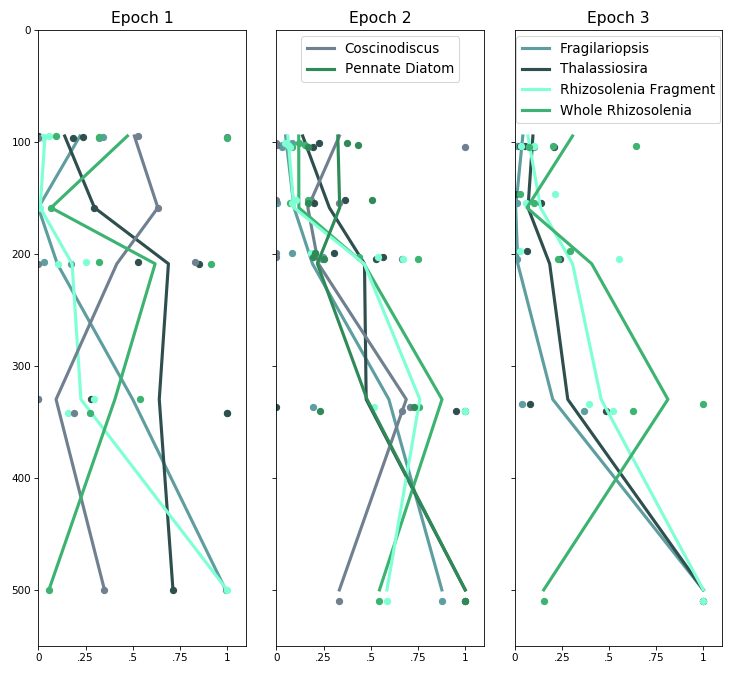

In [43]:
# All Epochs DIATOM pattern check
plt.figure(figsize=[10,9])
plt.subplot(1,3,1)

plt.plot(frag_1,depth_bins,'-',lw=3,color='cadetblue')
plt.plot(E1_normalized.loc['Fragilariopsis'].values,E1_depths,'o',color='cadetblue')
plt.plot(thal_1,depth_bins,'-',lw=3,color='darkslategray')
plt.plot(E1_normalized.loc['Thalassiosira'].values,E1_depths,'o',color='darkslategray')
plt.plot(rhizo_frag_1,depth_bins,'-',lw=3,color='aquamarine')
plt.plot(E1_normalized.loc['Rhizosolenia__Fragment'].values,E1_depths,'o',color='aquamarine')
plt.plot(Coscino_1,depth_bins,'-',lw=3, color='slategrey')
plt.plot(E1_normalized.loc['Coscinodiscus'].values,E1_depths,'o',color='slategrey')
plt.plot(rhizo_wh_1,depth_bins,'-',lw=3, color='mediumseagreen')
plt.plot(E1_normalized.loc['Rhizosolenia_Whole'].values,E1_depths,'o',color='mediumseagreen')#thizowhole
plt.xlim(0,1.1)
plt.ylim(550,0)
plt.xticks([0,.25,.50,.75,1],['0','.25','.5','.75','1'])
plt.title('Epoch 1',fontsize=15)

plt.subplot(1,3,2)
plt.plot(Frag_2,depth_bins,'-',lw=3,color='cadetblue')
plt.plot(E2_normalized.loc['Fragilariopsis'].values,E2_depths,'o',color='cadetblue')
plt.plot(thal_2,depth_bins,'-',lw=3,color='darkslategray')
plt.plot(E2_normalized.loc['Thalassiosira'].values,E2_depths,'o',color='darkslategray')
plt.plot(Coscino_2,depth_bins,'-',lw=3, color='slategrey',label='Coscinodiscus')
plt.plot(E2_normalized.loc['Coscinodiscus'].values,E2_depths,'o',color='slategrey')
plt.plot(rhizo_wh_2,depth_bins,'-',lw=3, color='mediumseagreen')
plt.plot(E2_normalized.loc['Rhizosolenia_Whole'].values,E2_depths,'o',color='mediumseagreen')#Rhizo whole
plt.plot(rhizo_frag_2,depth_bins,'-',lw=3,color='aquamarine')
plt.plot(E2_normalized.loc['Rhizosolenia__Fragment'].values,E2_depths,'o',color='aquamarine')#rhizo frag
plt.plot(Pennate_A2,depth_bins,'-',lw=3,color='seagreen',label='Pennate Diatom')
plt.plot(E2_normalized.loc['Pennate_A'].values,E2_depths,'o',color='seagreen')
plt.xlim(0,1.1)
plt.ylim(550,0)
plt.xticks([0,.25,.50,.75,1],['0','.25','.5','.75','1'])
plt.yticks([100,200,300,400,500],['','','','',''])
plt.title('Epoch 2',fontsize=15)
plt.legend(fontsize=13,loc=9)

plt.subplot(1,3,3)
plt.plot(frag_3,depth_bins,'-',lw=3,color='cadetblue',label='Fragilariopsis')
plt.plot(E3_normalized.loc['Fragilariopsis'].values,E3_depths,'o',color='cadetblue')
plt.plot(thal_3,depth_bins,'-',lw=3,color='darkslategray',label='Thalassiosira')
plt.plot(E3_normalized.loc['Thalassiosira'].values,E3_depths,'o',color='darkslategray')
plt.plot(rhizo_frag_3,depth_bins,'-',lw=3,color='aquamarine',label='Rhizosolenia Fragment')
plt.plot(E3_normalized.loc['Rhizosolenia__Fragment'].values,E3_depths,'o',color='aquamarine')
plt.plot(rhizo_wh_3,depth_bins,'-',lw=3,color='mediumseagreen',label='Whole Rhizosolenia')
plt.plot(E3_normalized.loc['Rhizosolenia_Whole'].values,E3_depths,'o',color='mediumseagreen')
plt.legend(fontsize=13,loc=9)

plt.xlim(0,1.1)
plt.ylim(550,0)
plt.xticks([0,.25,.50,.75,1],['0','.25','.5','.75','1'])
plt.yticks([100,200,300,400,500],['','','','',''])
plt.title('Epoch 3',fontsize=15)

plt.tight_layout()
#plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/FEB_11_All_Epochs_All_Patterns_Diatom_pattern_check.jpeg')

### Interpretation
    By viewing normalized depth profiles of principal diatom genera I can compare and
    contrast attenuation patterns of cells with widely different abundances. It is clear
    from this plot that there is no evidence for diatom cell flux attenuation between the
    100m and 330 meter depths. There is reasonable evidence that diatom flux is 
    increasing between these depths. It is unclear whether cell flux increases, decreases
    or stays constant between the 330m and 500m traps however. This is illuminated 
    clearly in this plot better than in others. Because there was only one trap 
    collecting at 500m for all 3 Epochs there is a greater range of uncertainty for flux
    values at this depth level.


## Combining fluxes by functional group (Diatom,Dinoflagellate etc...)
### Data normalized to 0-1 to make depth profile comparisons

In [44]:
functional_groups_total=combined_df.groupby(combined_df['group1']).sum()

functional_groups_t=functional_groups_total.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

E1func=functional_groups_t[E1_traps]
E2func=functional_groups_t[E2_traps]
E3func=functional_groups_t[E3_traps]
max1=E1func.max(axis=1)  # selectE1df
E1_norm=E1func.divide(max1,axis='rows')
#
max2=E2func.max(axis=1)  # selectE1df
E2_norm=E2func.divide(max2,axis='rows')
#
max3=E3func.max(axis=1)  # selectE1df
E3_norm=E3func.divide(max3,axis='rows')
#
#
#
#
normE1_100_avg=((E1_norm.RR1+E1_norm.RR6+ E1_norm.RR7)/3)
normE1_150_avg=E1_norm.RR8
normE1_200_avg=((E1_norm.RR9+E1_norm.RR10)/2)
normE1_330_avg=((E1_norm.RR4+E1_norm.RR11)/2)
normE1_500=E1_norm.RR5
norm_avgE1=[normE1_100_avg,normE1_150_avg,normE1_200_avg,normE1_330_avg,normE1_500]
#
normE2_100_avg=((E2_norm.RR23+E2_norm.RR28+ E2_norm.RR29)/3)
normE2_150_avg=((E2_norm.RR30+E2_norm.RR24)/2)
normE2_200_avg=((E2_norm.RR25+E2_norm.RR31+E2_norm.RR32)/3)
normE2_330_avg=((E2_norm.RR33+E2_norm.RR26)/2)
normE2_500=E2_norm.RR27
norm_avgE2=[normE2_100_avg,normE2_150_avg,normE2_200_avg,normE2_330_avg,normE2_500]
#
normE3_100_avg=((E3_norm.RR53+E3_norm.RR54+ E3_norm.RR58)/3)
normE3_150_avg=((E3_norm.RR55+E3_norm.RR59)/2)
normE3_200_avg=((E3_norm.RR56+E3_norm.RR60)/2)
normE3_330_avg=((E3_norm.RR57+E3_norm.RR61)/2)
normE3_500=E3_norm.RR62
norm_avgE3=[normE3_100_avg,normE3_150_avg,normE3_200_avg,normE3_330_avg,normE3_500]
#
norm_avgE3=pd.DataFrame()
norm_avgE3['100']=normE3_100_avg
norm_avgE3['150']=normE3_150_avg
norm_avgE3['200']=normE3_200_avg
norm_avgE3['330']=normE3_330_avg
norm_avgE3['500']=normE3_500
#
norm_avgE2=pd.DataFrame()
norm_avgE2['100']=normE2_100_avg
norm_avgE2['150']=normE2_150_avg
norm_avgE2['200']=normE2_200_avg
norm_avgE2['330']=normE2_330_avg
norm_avgE2['500']=normE2_500
#
norm_avgE1=pd.DataFrame()
norm_avgE1['100']=normE1_100_avg
norm_avgE1['150']=normE1_150_avg
norm_avgE1['200']=normE1_200_avg
norm_avgE1['330']=normE1_330_avg
norm_avgE1['500']=normE1_500

<IPython.core.display.Javascript object>


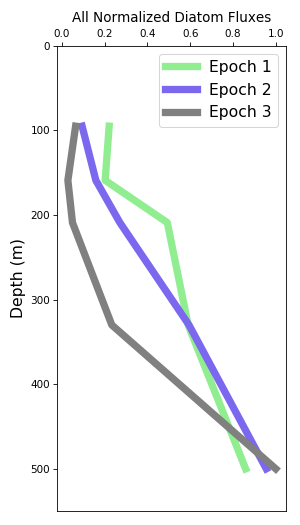

In [45]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
#
plt.figure(figsize=[4,7])
plt.plot(norm_avgE1.loc['Diatom'],depth_bins,'-',lw=7,color='lightgreen',label='Epoch 1')
plt.plot(norm_avgE2.loc['Diatom'],depth_bins,'-',lw=7,color='mediumslateblue',label='Epoch 2')
plt.plot(norm_avgE3.loc['Diatom'],depth_bins,'-',lw=7,color='gray',label='Epoch 3')

plt.ylabel('Depth (m)',fontsize=15)

plt.ylim(550,0)
plt.legend(fontsize=15)
plt.title('All Normalized Diatom Fluxes',fontsize=13)
plt.tight_layout()
#plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/Feb11_E123_Diatom_Avg_flux_lines.jpeg')

### Interpretation
       Viewing these normalized Diatom depth profiles from all Epochs in one pane of view allows one to see that the increase in diatom cell flux with depth is consistent across all Epochs: It begins at around 150 meters. Between 100 and 150 meters flux (in all Epochs) remains relatively constant. Epochs 1 and 2 initiate flux increases higher in the water collumn than Epoch 3. Because Epochs 1,2 and 3 are sequential blocks of time, it is worth considering whether this plot reveals a time-lag collection of the same abundant group of sinking cells. For instance: could the first high flux event in Epoch 1 (bright green protrusion at 200 meters) be picked up several days later (along with other flux) indicated by the steady slope increase in Epoch 2 (purple line between 350-450m) and lastly a few days after that at 500 meters (gray line with highest diatom flux numbers at 500m). The diatom sinking rates needed to fit this scenario is approximately 40meters/day which is within known ranges of these particular diatom genera.

## Colorblock plots for total cell fluxes

In [46]:
#merged DFs:Diatoms, Phaeodaria, Radiolaria,
#Rhiz_other,Coccos,Other

Diatoma1=combined_df.loc[combined_df.group=='Diatom']
Diatoma2=combined_df.loc[combined_df.Class=='Bacillariophyta']
Diatoms=pd.merge(Diatoma1,Diatoma2,how='outer')
######
Phaeodaria=combined_df.loc[combined_df.Class=='Phaeodaria']
#
Rad1=combined_df.loc[combined_df.Class=='Polycystina']
Rad2=combined_df.loc[combined_df.group1=='Radiolarian']
Radiolaria=pd.merge(Rad1,Rad2,how='outer')
#
r1=combined_df.loc[combined_df.group1=='Acantharian']
r2=combined_df.loc[combined_df.group1=='Foraminifera']
Rhiz_Other=pd.merge(r1,r2,how='outer')
Rhiz_Other
#
Coccos=combined_df.loc[combined_df.group=='Coccolithophore']
#
o3=combined_df.loc[combined_df.group=='Ciliate']
o1=combined_df.loc[combined_df.group=='Silicoflagellate']
o2=combined_df.loc[combined_df.group=='Dinoflagellate']
Ot=pd.merge(o1,o2,how='outer')
Other=pd.merge(Ot,o3,how='outer')


In [47]:
sde1=Diatoms[E1_traps].sum()
de2=Diatoms[E2_traps].sum()
de3=Diatoms[E3_traps].sum()
re1=Rhiz_Other[E1_traps].sum()
re2=Rhiz_Other[E2_traps].sum()
re3=Rhiz_Other[E3_traps].sum()
rade1=Radiolaria[E1_traps].sum()
rade2=Radiolaria[E2_traps].sum()
rade3=Radiolaria[E3_traps].sum()
pe1=Phaeodaria[E1_traps].sum()
pe2=Phaeodaria[E2_traps].sum()
pe3=Phaeodaria[E3_traps].sum()
ce1=Coccos[E1_traps].sum()
ce2=Coccos[E2_traps].sum()
ce3=Coccos[E3_traps].sum()
oe1=Other[E1_traps].sum()
oe2=Other[E2_traps].sum()
oe3=Other[E3_traps].sum()

In [48]:
Coscino=combined_df.loc[combined_df.Category=='Coscinodiscus']
Frag=combined_df.loc[combined_df.Category=='Fragilariopsis']
Rhizo_frag=combined_df.loc[combined_df.Category=='Rhizosolenia_Fragment']
Rhizo=combined_df.loc[combined_df.Category=='Rhizosolenia_Whole']
Emiliania=combined_df.loc[combined_df.Category=='Emiliania']
Thalassiosira=combined_df.loc[combined_df.Category=='Thalassiosira']

In [49]:
#DIATOMS
#f=fragilariopsis
#sol=rhizosolenia
#solf=Rhizosolenia_fragment
#t=thalassiosira
#co=coscinodiscus
#e=emiliania

#FUNCTIONAL GROUPS
#p=phaeodaria
#c=Coccolithophores
#o=other cells (scarce)
#rad=radiolaria
#r=Rhizaria

#s=SUM

de1=Diatoms[E1_traps].sum()
de2=Diatoms[E2_traps].sum()
de3=Diatoms[E3_traps].sum()
re1=Rhiz_Other[E1_traps].sum()
re2=Rhiz_Other[E2_traps].sum()
re3=Rhiz_Other[E3_traps].sum()
rade1=Radiolaria[E1_traps].sum()
rade2=Radiolaria[E2_traps].sum()
rade3=Radiolaria[E3_traps].sum()
pe1=Phaeodaria[E1_traps].sum()
pe2=Phaeodaria[E2_traps].sum()
pe3=Phaeodaria[E3_traps].sum()
ce1=Coccos[E1_traps].sum()
ce2=Coccos[E2_traps].sum()
ce3=Coccos[E3_traps].sum()
oe1=Other[E1_traps].sum()
oe2=Other[E2_traps].sum()
oe3=Other[E3_traps].sum()
fe1=Frag[E1_traps].sum()
fe2=Frag[E2_traps].sum()
fe3=Frag[E3_traps].sum()
solfe1=Rhizo_frag[E1_traps].sum()
solfe2=Rhizo_frag[E2_traps].sum()
solfe3=Rhizo_frag[E3_traps].sum()
sole1=Rhizo[E1_traps].sum()
sole2=Rhizo[E2_traps].sum()
sole3=Rhizo[E3_traps].sum()
te1=Thalassiosira[E1_traps].sum()
te2=Thalassiosira[E2_traps].sum()
te3=Thalassiosira[E3_traps].sum()
coe1=Coscino[E1_traps].sum()
coe2=Coscino[E2_traps].sum()
coe3=Coscino[E3_traps].sum()
ee1=Emiliania[E1_traps].sum()
ee2=Emiliania[E2_traps].sum()
ee3=Emiliania[E3_traps].sum()
#########################################
#ColorBlock_Epoch_1
#
solfE1_100_avg=((solfe1.loc['RR1']+solfe1.loc['RR6']+solfe1.loc['RR7'])/3)
solfE1_150_avg=solfe1.loc['RR8']
solfE1_200_avg=((solfe1.loc['RR9']+solfe1.loc['RR10'])/2)
solfE1_330_avg=((solfe1.loc['RR4']+solfe1.loc['RR11'])/2)
solfE1_500=solfe1.loc['RR5']
solf_avgE1=[solfE1_100_avg,solfE1_150_avg,solfE1_200_avg,solfE1_330_avg,solfE1_500]
#
rE1_100_avg=((re1.loc['RR1']+re1.loc['RR6']+re1.loc['RR7'])/3)
rE1_150_avg=re1.loc['RR8']
rE1_200_avg=((re1.loc['RR9']+re1.loc['RR10'])/2)
rE1_330_avg=((re1.loc['RR4']+re1.loc['RR11'])/2)
rE1_500=re1.loc['RR5']
r_avgE1=[rE1_100_avg,rE1_150_avg,rE1_200_avg,rE1_330_avg,rE1_500]
#
dE1_100_avg=((de1.loc['RR1']+de1.loc['RR6']+de1.loc['RR7'])/3)
dE1_150_avg=de1.loc['RR8']
dE1_200_avg=((de1.loc['RR9']+de1.loc['RR10'])/2)
dE1_330_avg=((de1.loc['RR4']+de1.loc['RR11'])/2)
dE1_500=de1.loc['RR5']
d_avgE1=[dE1_100_avg,dE1_150_avg,dE1_200_avg,dE1_330_avg,dE1_500]

radE1_100_avg=((rade1.loc['RR1']+rade1.loc['RR6']+rade1.loc['RR7'])/3)
radE1_150_avg=rade1.loc['RR8']
radE1_200_avg=((rade1.loc['RR9']+rade1.loc['RR10'])/2)
radE1_330_avg=((rade1.loc['RR4']+rade1.loc['RR11'])/2)
radE1_500=rade1.loc['RR5']
rad_avgE1=[radE1_100_avg,radE1_150_avg,radE1_200_avg,radE1_330_avg,radE1_500]
#
cE1_100_avg=((ce1.loc['RR1']+ce1.loc['RR6']+ce1.loc['RR7'])/3)
cE1_150_avg=ce1.loc['RR8']
cE1_200_avg=((ce1.loc['RR9']+ce1.loc['RR10'])/2)
cE1_330_avg=((ce1.loc['RR4']+ce1.loc['RR11'])/2)
cE1_500=ce1.loc['RR5']
c_avgE1=[cE1_100_avg,cE1_150_avg,cE1_200_avg,cE1_330_avg,cE1_500]
#
pE1_100_avg=((pe1.loc['RR1']+pe1.loc['RR6']+pe1.loc['RR7'])/3)
pE1_150_avg=pe1.loc['RR8']
pE1_200_avg=((pe1.loc['RR9']+pe1.loc['RR10'])/2)
pE1_330_avg=((pe1.loc['RR4']+pe1.loc['RR11'])/2)
pE1_500=pe1.loc['RR5']
p_avgE1=[pE1_100_avg,pE1_150_avg,pE1_200_avg,pE1_330_avg,pE1_500]
#
oE1_100_avg=((oe1.loc['RR1']+oe1.loc['RR6']+oe1.loc['RR7'])/3)
oE1_150_avg=oe1.loc['RR8']
oE1_200_avg=((oe1.loc['RR9']+oe1.loc['RR10'])/2)
oE1_330_avg=((oe1.loc['RR4']+oe1.loc['RR11'])/2)
oE1_500=oe1.loc['RR5']
o_avgE1=[oE1_100_avg,oE1_150_avg,oE1_200_avg,oE1_330_avg,oE1_500]
##
fE1_100_avg=((fe1.loc['RR1']+fe1.loc['RR6']+fe1.loc['RR7'])/3)
fE1_150_avg=fe1.loc['RR8']
fE1_200_avg=((fe1.loc['RR9']+fe1.loc['RR10'])/2)
fE1_330_avg=((fe1.loc['RR4']+fe1.loc['RR11'])/2)
fE1_500=fe1.loc['RR5']
f_avgE1=[fE1_100_avg,fE1_150_avg,fE1_200_avg,fE1_330_avg,fE1_500]
#

solE1_100_avg=((sole1.loc['RR1']+sole1.loc['RR6']+sole1.loc['RR7'])/3)
solE1_150_avg=sole1.loc['RR8']
solE1_200_avg=((sole1.loc['RR9']+sole1.loc['RR10'])/2)
solE1_330_avg=((sole1.loc['RR4']+sole1.loc['RR11'])/2)
solE1_500=sole1.loc['RR5']
sol_avgE1=[solE1_100_avg,solE1_150_avg,solE1_200_avg,solE1_330_avg,solE1_500]
#
eE1_100_avg=((ee1.loc['RR1']+ee1.loc['RR6']+ee1.loc['RR7'])/3)
eE1_150_avg=ee1.loc['RR8']
eE1_200_avg=((ee1.loc['RR9']+ee1.loc['RR10'])/2)
eE1_330_avg=((ee1.loc['RR4']+ee1.loc['RR11'])/2)
eE1_500=ce1.loc['RR5']
e_avgE1=[eE1_100_avg,eE1_150_avg,eE1_200_avg,eE1_330_avg,eE1_500]
#
tE1_100_avg=((te1.loc['RR1']+te1.loc['RR6']+te1.loc['RR7'])/3)
tE1_150_avg=te1.loc['RR8']
tE1_200_avg=((te1.loc['RR9']+te1.loc['RR10'])/2)
tE1_330_avg=((te1.loc['RR4']+te1.loc['RR11'])/2)
tE1_500=te1.loc['RR5']
t_avgE1=[tE1_100_avg,tE1_150_avg,tE1_200_avg,tE1_330_avg,tE1_500]
#########################################################################
#ColorBlock_Epoch_2

rE2_100_avg=((re2.loc['RR23']+re2.loc['RR28']+re2.loc['RR29'])/3)
rE2_150_avg=((re2.loc['RR30']+re2.loc['RR24'])/2)
rE2_200_avg=((re2.loc['RR25']+re2.loc['RR31']+re2.loc['RR32'])/3)
rE2_330_avg=((re2.loc['RR33']+re2.loc['RR26'])/2)
rE2_500=re2.loc['RR27']
r_avgE2=[rE2_100_avg,rE2_150_avg,rE2_200_avg,rE2_330_avg,rE2_500]
#
dE2_100_avg=((de2.loc['RR23']+de2.loc['RR28']+de2.loc['RR29'])/3)
dE2_150_avg=((de2.loc['RR30']+de2.loc['RR24'])/2)
dE2_200_avg=((de2.loc['RR25']+de2.loc['RR31']+de2.loc['RR32'])/3)
dE2_330_avg=((de2.loc['RR33']+de2.loc['RR26'])/2)
dE2_500=de2.loc['RR27']
d_avgE2=[dE2_100_avg,dE2_150_avg,dE2_200_avg,dE2_330_avg,dE2_500]
#
radE2_100_avg=((rade2.loc['RR23']+rade2.loc['RR28']+rade2.loc['RR29'])/3)
radE2_150_avg=((rade2.loc['RR30']+rade2.loc['RR24'])/2)
radE2_200_avg=((rade2.loc['RR25']+rade2.loc['RR31']+rade2.loc['RR32'])/3)
radE2_330_avg=((rade2.loc['RR33']+rade2.loc['RR26'])/2)
radE2_500=rade2.loc['RR27']
rad_avgE2=[radE2_100_avg,radE2_150_avg,radE2_200_avg,radE2_330_avg,radE2_500]
#
cE2_100_avg=((ce2.loc['RR23']+ce2.loc['RR28']+ce2.loc['RR29'])/3)
cE2_150_avg=((ce2.loc['RR30']+ce2.loc['RR24'])/2)
cE2_200_avg=((ce2.loc['RR25']+ce2.loc['RR31']+ce2.loc['RR32'])/3)
cE2_330_avg=((ce2.loc['RR33']+ce2.loc['RR26'])/2)
cE2_500=ce2.loc['RR27']
c_avgE2=[cE2_100_avg,cE2_150_avg,cE2_200_avg,cE2_330_avg,cE2_500]
#
pE2_100_avg=((pe2.loc['RR23']+pe2.loc['RR28']+pe2.loc['RR29'])/3)
pE2_150_avg=((pe2.loc['RR30']+pe2.loc['RR24'])/2)
pE2_200_avg=((pe2.loc['RR25']+pe2.loc['RR31']+pe2.loc['RR32'])/3)
pE2_330_avg=((pe2.loc['RR33']+pe2.loc['RR26'])/2)
pE2_500=pe2.loc['RR27']
p_avgE2=[pE2_100_avg,pE2_150_avg,pE2_200_avg,pE2_330_avg,pE2_500]

oE2_100_avg=((oe2.loc['RR23']+oe2.loc['RR28']+oe2.loc['RR29'])/3)
oE2_150_avg=((oe2.loc['RR30']+oe2.loc['RR24'])/2)
oE2_200_avg=((oe2.loc['RR25']+oe2.loc['RR31']+oe2.loc['RR32'])/3)
oE2_330_avg=((oe2.loc['RR33']+oe2.loc['RR26'])/2)
oE2_500=oe2.loc['RR27']
o_avgE2=[oE2_100_avg,oE2_150_avg,oE2_200_avg,oE2_330_avg,oE2_500]


fE2_100_avg=((fe2.loc['RR23']+fe2.loc['RR28']+fe2.loc['RR29'])/3)
fE2_150_avg=((fe2.loc['RR30']+fe2.loc['RR24'])/2)
fE2_200_avg=((fe2.loc['RR25']+fe2.loc['RR31']+fe2.loc['RR32'])/3)
fE2_330_avg=((fe2.loc['RR33']+fe2.loc['RR26'])/2)
fE2_500=fe2.loc['RR27']
f_avgE2=[fE2_100_avg,fE2_150_avg,fE2_200_avg,fE2_330_avg,fE2_500]
#
solfE2_100_avg=((solfe2.loc['RR23']+solfe2.loc['RR28']+solfe2.loc['RR29'])/3)
solfE2_150_avg=((solfe2.loc['RR30']+solfe2.loc['RR24'])/2)
solfE2_200_avg=((solfe2.loc['RR25']+solfe2.loc['RR31']+solfe2.loc['RR32'])/3)
solfE2_330_avg=((solfe2.loc['RR33']+solfe2.loc['RR26'])/2)
solfE2_500=solfe2.loc['RR27']
solf_avgE2=[solfE2_100_avg,solfE2_150_avg,solfE2_200_avg,solfE2_330_avg,solfE2_500]

solE2_100_avg=((sole2.loc['RR23']+sole2.loc['RR28']+sole2.loc['RR29'])/3)
solE2_150_avg=((sole2.loc['RR30']+sole2.loc['RR24'])/2)
solE2_200_avg=((sole2.loc['RR25']+sole2.loc['RR31']+sole2.loc['RR32'])/3)
solE2_330_avg=((sole2.loc['RR33']+sole2.loc['RR26'])/2)
solE2_500=sole2.loc['RR27']
sol_avgE2=[solE2_100_avg,solE2_150_avg,solE2_200_avg,solE2_330_avg,solE2_500]
#
eE2_100_avg=((ee2.loc['RR23']+ee2.loc['RR28']+ee2.loc['RR29'])/3)
eE2_150_avg=((ee2.loc['RR30']+ee2.loc['RR24'])/2)
eE2_200_avg=((ee2.loc['RR25']+ee2.loc['RR31']+ee2.loc['RR32'])/3)
eE2_330_avg=((ee2.loc['RR33']+ee2.loc['RR26'])/2)
eE2_500=ee2.loc['RR27']
e_avgE2=[eE2_100_avg,eE2_150_avg,eE2_200_avg,eE2_330_avg,eE2_500]
#
tE2_100_avg=((te2.loc['RR23']+te2.loc['RR28']+te2.loc['RR29'])/3)
tE2_150_avg=((te2.loc['RR30']+te2.loc['RR24'])/2)
tE2_200_avg=((te2.loc['RR25']+te2.loc['RR31']+te2.loc['RR32'])/3)
tE2_330_avg=((te2.loc['RR33']+te2.loc['RR26'])/2)
tE2_500=te2.loc['RR27']
t_avgE2=[tE2_100_avg,tE2_150_avg,tE2_200_avg,tE2_330_avg,tE2_500]
###########################################################################
#ColorBlock_Epoch_3
#
rE3_100_avg=((re3.loc['RR53']+re3.loc['RR54']+re3.loc['RR58'])/3)
rE3_150_avg=((re3.loc['RR55']+re3.loc['RR59'])/2)
rE3_200_avg=((re3.loc['RR56']+re3.loc['RR60']/2))
rE3_330_avg=((re3.loc['RR57']+re3.loc['RR61'])/2)
rE3_500=re3.loc['RR62']
r_avgE3=[rE3_100_avg, rE3_150_avg,rE3_200_avg,rE3_330_avg,rE3_500]
#
dE3_100_avg=((de3.loc['RR53']+de3.loc['RR54']+de3.loc['RR58'])/3)
dE3_150_avg=((de3.loc['RR55']+de3.loc['RR59'])/2)
dE3_200_avg=((de3.loc['RR56']+de3.loc['RR60']/2))
dE3_330_avg=((de3.loc['RR57']+de3.loc['RR61'])/2)
dE3_500=de3.loc['RR62']
d_avgE3=[dE3_100_avg, dE3_150_avg,dE3_200_avg,dE3_330_avg,dE3_500]
#
radE3_100_avg=((rade3.loc['RR53']+rade3.loc['RR54']+rade3.loc['RR58'])/3)
radE3_150_avg=((rade3.loc['RR55']+rade3.loc['RR59'])/2)
radE3_200_avg=((rade3.loc['RR56']+rade3.loc['RR60']/2))
radE3_330_avg=((rade3.loc['RR57']+rade3.loc['RR61'])/2)
radE3_500=re3.loc['RR62']
rad_avgE3=[radE3_100_avg, radE3_150_avg,radE3_200_avg,radE3_330_avg,radE3_500]
#
cE3_100_avg=((ce3.loc['RR53']+ce3.loc['RR54']+ce3.loc['RR58'])/3)
cE3_150_avg=((ce3.loc['RR55']+ce3.loc['RR59'])/2)
cE3_200_avg=((ce3.loc['RR56']+ce3.loc['RR60']/2))
cE3_330_avg=((ce3.loc['RR57']+ce3.loc['RR61'])/2)
cE3_500=ce3.loc['RR62']
c_avgE3=[cE3_100_avg, cE3_150_avg,cE3_200_avg,cE3_330_avg,cE3_500]

pE3_100_avg=((pe3.loc['RR53']+pe3.loc['RR54']+pe3.loc['RR58'])/3)
pE3_150_avg=((pe3.loc['RR55']+pe3.loc['RR59'])/2)
pE3_200_avg=((pe3.loc['RR56']+pe3.loc['RR60']/2))
pE3_330_avg=((pe3.loc['RR57']+pe3.loc['RR61'])/2)
pE3_500=pe3.loc['RR62']
p_avgE3=[pE3_100_avg, pE3_150_avg,pE3_200_avg,pE3_330_avg,pE3_500]

oE3_100_avg=((oe3.loc['RR53']+oe3.loc['RR54']+oe3.loc['RR58'])/3)
oE3_150_avg=((oe3.loc['RR55']+oe3.loc['RR59'])/2)
oE3_200_avg=((oe3.loc['RR56']+oe3.loc['RR60']/2))
oE3_330_avg=((oe3.loc['RR57']+oe3.loc['RR61'])/2)
oE3_500=oe3.loc['RR62']
o_avgE3=[oE3_100_avg, oE3_150_avg,oE3_200_avg,oE3_330_avg,oE3_500]

fE3_100_avg=((fe3.loc['RR53']+fe3.loc['RR54']+fe3.loc['RR58'])/3)
fE3_150_avg=((fe3.loc['RR55']+fe3.loc['RR59'])/2)
fE3_200_avg=((fe3.loc['RR56']+fe3.loc['RR60']/2))
fE3_330_avg=((fe3.loc['RR57']+fe3.loc['RR61'])/2)
fE3_500=fe3.loc['RR62']
f_avgE3=[fE3_100_avg, fE3_150_avg,fE3_200_avg,fE3_330_avg,fE3_500]
#
solfE3_100_avg=((solfe3.loc['RR53']+solfe3.loc['RR54']+solfe3.loc['RR58'])/3)
solfE3_150_avg=((solfe3.loc['RR55']+solfe3.loc['RR59'])/2)
solfE3_200_avg=((solfe3.loc['RR56']+solfe3.loc['RR60']/2))
solfE3_330_avg=((solfe3.loc['RR57']+solfe3.loc['RR61'])/2)
solfE3_500=solfe3.loc['RR62']
solf_avgE3=[solfE3_100_avg, solfE3_150_avg,solfE3_200_avg,solfE3_330_avg,solfE3_500]
#
solE3_100_avg=((sole3.loc['RR53']+sole3.loc['RR54']+sole3.loc['RR58'])/3)
solE3_150_avg=((sole3.loc['RR55']+sole3.loc['RR59'])/2)
solE3_200_avg=((sole3.loc['RR56']+sole3.loc['RR60']/2))
solE3_330_avg=((sole3.loc['RR57']+sole3.loc['RR61'])/2)
solE3_500=sole3.loc['RR62']
sol_avgE3=[solE3_100_avg, solE3_150_avg,solE3_200_avg,solE3_330_avg,solE3_500]
#
eE3_100_avg=((ee3.loc['RR53']+ee3.loc['RR54']+ee3.loc['RR58'])/3)
eE3_150_avg=((ee3.loc['RR55']+ee3.loc['RR59'])/2)
eE3_200_avg=((ee3.loc['RR56']+ee3.loc['RR60']/2))
eE3_330_avg=((ee3.loc['RR57']+ee3.loc['RR61'])/2)
eE3_500=ee3.loc['RR62']
e_avgE3=[eE3_100_avg, eE3_150_avg,eE3_200_avg,eE3_330_avg,eE3_500]
#
tE3_100_avg=((te3.loc['RR53']+te3.loc['RR54']+te3.loc['RR58'])/3)
tE3_150_avg=((te3.loc['RR55']+te3.loc['RR59'])/2)
tE3_200_avg=((te3.loc['RR56']+te3.loc['RR60']/2))
tE3_330_avg=((te3.loc['RR57']+te3.loc['RR61'])/2)
tE3_500=te3.loc['RR62']
t_avgE3=[tE3_100_avg, tE3_150_avg,tE3_200_avg,tE3_330_avg,tE3_500]

# Total Cell Flux plot
    x axis: depth    y axis: Millions of Cells m-1 day-1
    Dots represent values from traps
    Solid lines represent averages for that depth

<IPython.core.display.Javascript object>


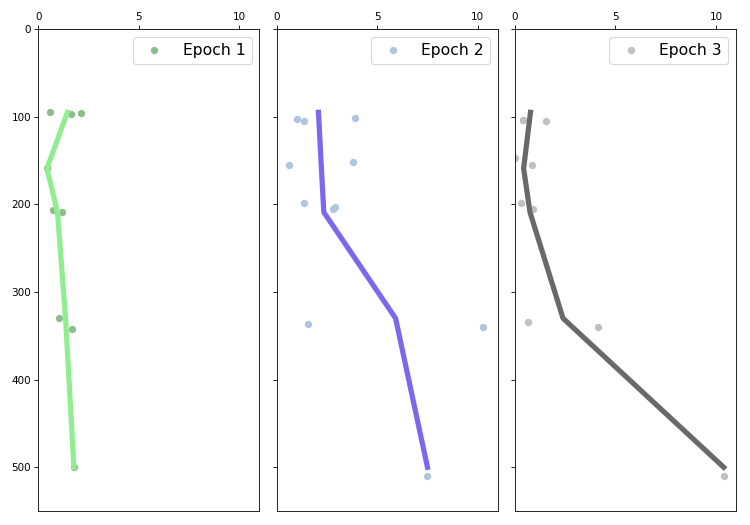

In [50]:
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True
plt.figure(figsize=[10,7])
plt.subplot(1,3,1)
plt.plot(E1_flux,E1_depths,'o',color='darkseagreen',label='Epoch 1')
plt.plot(df_avgE1,depth_bins,'-',lw=5,color='lightgreen')
plt.ylim(550,0)
plt.xlim(1000,1.1e7)
plt.xticks([0,.5e7,1e7],labels=['0','5','10'])
plt.yticks([0,100,200,300,400,500],labels=['0','100','200','300','400','500'])
plt.legend(fontsize=15)
#
plt.subplot(1,3,2)
#plt.title('Epoch 3 Flux')
plt.plot(E2_flux, E2_depths,'o',color='lightsteelblue',label='Epoch 2')
plt.plot(df_avgE2,depth_bins,'-',lw=5,color='mediumslateblue')
#plt.xlabel('cells/m2/day')
plt.ylim(550,0)
plt.xlim(1000,1.1e7)
plt.xticks([0,.5e7,1e7],labels=['0','5','10'])
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
#plt.title('Total Cell Flux')
#
plt.subplot(1,3,3)
plt.plot(E3_flux,E3_depths,'o',color='silver',label='Epoch 3')
plt.plot(df_avgE3,depth_bins,'-',lw=5,color='dimgrey')
plt.ylim(550,0)
plt.xlim(1000,1.1e7)
plt.xticks([0,.5e7,1e7],labels=['0','5','10'])
plt.yticks([0,100,200,300,400,500],labels=['','','','','',''])
plt.legend(fontsize=15)
plt.tight_layout()
#plt.savefig('/Users/alb/PROJECTS/EXPORTS/EXPORTS_1/EXPORTS_plots_jpegs/FEB14_Total_cell_flux_EPOCHS.jpeg')

## Interpretation
    Takeaways: quantity of total cell flux increases throughout the sampling month. 
    
    The Quantity of total cell flux increases with depth, most distinctly in Epochs 2&3.
    
    Cell counting uncertainty for samples (depicted as error bars on dots) is 
    infinitesimal. 
    
    Flux variability between replicate traps collecting at similar depths is by far the
    larger source of variability in this data.
    
    Unexpected increase(as opossed to attenuation) of cells with depth requires careful 
    consideration of possible explanations.

### Total Cell flux Plot broken down by functional group

<IPython.core.display.Javascript object>


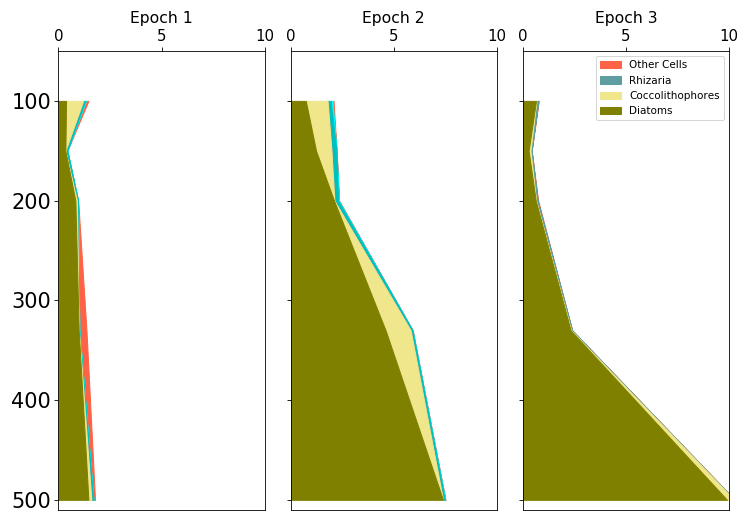

In [53]:

e1Diatom_x=np.asarray(d_avgE1)
e1Cocco_x=np.asarray(c_avgE1)+e1Diatom_x
e1Phaeo_x=np.asarray(p_avgE1)+e1Cocco_x
e1Radio_x=np.asarray(rad_avgE1)+e1Phaeo_x
e1Rhiz_ot_x=np.asarray(r_avgE1)+e1Radio_x
e1Other_x=np.asarray(o_avgE1)+e1Rhiz_ot_x
#
e2Diatom_x=np.asarray(d_avgE2)
e2Cocco_x=np.asarray(c_avgE2)+e2Diatom_x
e2Phaeo_x=np.asarray(p_avgE2)+e2Cocco_x
e2Radio_x=np.asarray(rad_avgE2)+e2Phaeo_x
e2Rhiz_ot_x=np.asarray(r_avgE2)+e2Radio_x
e2Other_x=np.asarray(o_avgE2)+e2Rhiz_ot_x
#
e3Diatom_x=np.asarray(d_avgE3)
e3Cocco_x=np.asarray(c_avgE3)+e3Diatom_x
e3Phaeo_x=np.asarray(p_avgE3)+e3Cocco_x
e3Radio_x=np.asarray(rad_avgE3)+e3Phaeo_x
e3Rhiz_ot_x=np.asarray(r_avgE3)+e3Radio_x
e3Other_x=np.asarray(o_avgE3)+e3Rhiz_ot_x

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(10,7))


ax1 = plt.subplot(131)
ax2=plt.subplot(132)
ax3=plt.subplot(133)

ax1.plot(e1Other_x,[100,150,200,330,500],lw='0',color='tomato')#other cells
ax1.fill_betweenx([100,150,200,330,500],e1Other_x,e1Rhiz_ot_x,color='tomato',label='Dinos')#Othercells
ax1.plot(e1Rhiz_ot_x,[100,150,200,330,500],lw='0',color='aqua')#other rhizaria
ax1.fill_betweenx([100,150,200,330,500],e1Rhiz_ot_x,e1Radio_x,color='aqua')#other rhizaria
ax1.plot(e1Radio_x,[100,150,200,330,500],lw='0',color='c')#
ax1.fill_betweenx([100,150,200,330,500],e1Radio_x,e1Phaeo_x,color='c')# phaeo
ax1.plot(e1Phaeo_x,[100,150,200,330,500],lw='0',color='cadetblue')#  phaeo
ax1.fill_betweenx([100,150,200,330,500],e1Phaeo_x,e1Cocco_x,color='cadetblue')
ax1.plot(e1Cocco_x,[100,150,200,330,500],lw='0',color='khaki')# c
ax1.fill_betweenx([100,150,200,330,500],e1Cocco_x,e1Diatom_x,color='khaki') #c
ax1.plot(e1Diatom_x,[100,150,200,330,500],lw='0',color='olive')# Diatom
ax1.fill_betweenx([100,150,200,330,500],e1Diatom_x,color='olive') #diatom
ax1.set_ylim([510,50])
ax1.set_yticks([100,200,300,400,500])
ax1.set_yticklabels(['100','200','300','400','500'],fontsize=20)
ax1.set_xlim([0,1e7])
ax1.set_xticks([0,0.5e7,1e7])
ax1.set_xticklabels(['0','5','10'],fontsize='x-large')
ax1.set_title('Epoch 1',fontsize=15)

#
ax2.plot(e2Other_x,[100,150,200,330,500],lw='0',color='tomato')#other cells
ax2.fill_betweenx([100,150,200,330,500],e2Other_x,e2Rhiz_ot_x,color='tomato')#Othercells
ax2.plot(e2Rhiz_ot_x,[100,150,200,330,500],lw='0',color='aqua')#other rhizaria
ax2.fill_betweenx([100,150,200,330,500],e2Rhiz_ot_x,e2Radio_x,color='aqua')#other rhizaria
ax2.plot(e2Radio_x,[100,150,200,330,500],lw='0',color='c')#
ax2.fill_betweenx([100,150,200,330,500],e2Radio_x,e2Phaeo_x,color='c')# phaeo
ax2.plot(e2Phaeo_x,[100,150,200,330,500],lw='0',color='cadetblue')#  phaeo
ax2.fill_betweenx([100,150,200,330,500],e2Phaeo_x,e2Cocco_x,color='cadetblue')
ax2.plot(e2Cocco_x,[100,150,200,330,500],lw='0',color='khaki')# c
ax2.fill_betweenx([100,150,200,330,500],e2Cocco_x,e2Diatom_x,color='khaki') #c
ax2.plot(e2Diatom_x,[100,150,200,330,500],lw='0',color='olive')# Diatom
ax2.fill_betweenx([100,150,200,330,500],e2Diatom_x,color='olive') #diatom
ax2.set_ylim([510,50])
ax2.set_yticks([100,200,300,400,500])
ax2.set_yticklabels(['','','','','',''],fontsize=20)
ax2.set_xlim([0,1e7])
ax2.set_xticks([0,0.5e7,1e7])
ax2.set_xticklabels(['0','5','10'],fontsize='x-large')
ax2.set_title('Epoch 2',fontsize=15)
#
####
ax3.plot(e3Other_x,[100,150,200,330,500],lw='0',color='mediumslateblue')#other cells
ax3.fill_betweenx([100,150,200,330,500],e3Other_x,e3Rhiz_ot_x,color='tomato',label='Other Cells')#Othercells
ax3.plot(e3Rhiz_ot_x,[100,150,200,330,500],lw='0',color='cadetblue')#other rhizaria
ax3.fill_betweenx([100,150,200,330,500],e3Rhiz_ot_x,e3Radio_x,color='cadetblue',label='Rhizaria')#other rhizaria
ax3.plot(e3Radio_x,[100,150,200,330,500],lw='0',color='aqua')#
ax3.fill_betweenx([100,150,200,330,500],e3Radio_x,e3Phaeo_x,color='cadetblue',)# phaeo
ax3.plot(e3Phaeo_x,[100,150,200,330,500],lw='0',color='cadetblue')#  phaeo
ax3.fill_betweenx([100,150,200,330,500],e3Phaeo_x,e3Cocco_x,color='cadetblue')
ax3.plot(e3Cocco_x,[100,150,200,330,500],lw='0',color='khaki')# c
ax3.fill_betweenx([100,150,200,330,500],e3Cocco_x,e3Diatom_x,color='khaki',label='Coccolithophores') #c
ax3.plot(e3Diatom_x,[100,150,200,330,500],lw='0',color='olive')# Diatom
ax3.fill_betweenx([100,150,200,330,500],e3Diatom_x,color='olive',label='Diatoms') #diatom
ax3.set_ylim([510,50])
ax3.set_yticks([100,200,300,400,500])
ax3.set_yticklabels(['','','','','',''],fontsize=20)
ax3.set_xlim([0,1e7])
ax3.set_xticks([0,0.5e7,1e7])
ax3.set_xticklabels(['0','5','10'],fontsize='x-large')
ax3.set_title('Epoch 3',fontsize=15)
ax3.legend(loc=1,fontsize='medium',frameon='false',fancybox='false')

plt.tight_layout()

### Interpretation
    This plot illustrates that Diatoms (green) dominate in total cell flux and are the group responsible for driving this unexpected increase in cell flux with depth (unexpected in that it is the direct opposite of The Martin Curve which is used in most models of POC flux).



## Diatom Flux Increase with Depth Broken down by Diatom Genus (high abundance genera used)

<IPython.core.display.Javascript object>


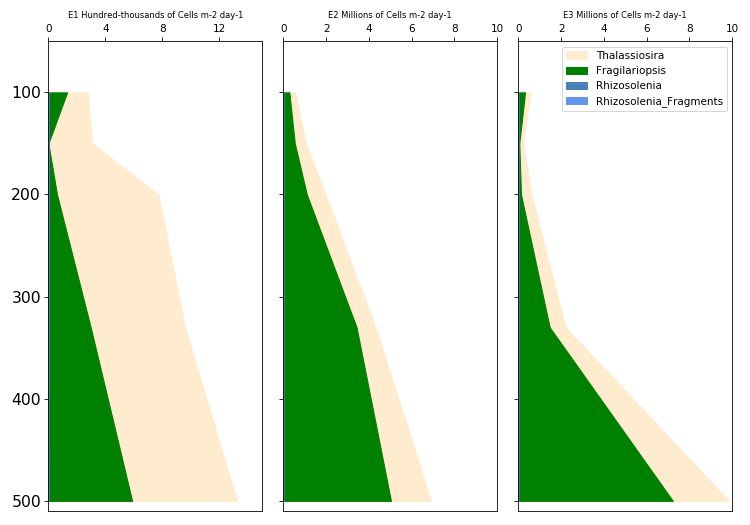

In [54]:

plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labeltop'] = True

plt.figure(figsize=(10,7))
ax1 = plt.subplot(131)
ax2=plt.subplot(132)
ax3=plt.subplot(133)

e1Sol_frag_x=np.asarray(solf_avgE1)
e1Sol_x=np.asarray(sol_avgE1)+e1Sol_frag_x
e1Frag_x=np.asarray(f_avgE1)+e1Sol_x
e1Thal_x=np.asarray(t_avgE1)+e1Frag_x

ax1.plot(e1Thal_x,[100,150,200,330,500],lw='0',color='blanchedalmond')#other rhizaria
ax1.fill_betweenx([100,150,200,330,500],e1Thal_x,e1Frag_x,color='blanchedalmond',label='Thalassiosira')
ax1.plot(e1Frag_x,[100,150,200,330,500],lw='0',color='g')#
ax1.fill_betweenx([100,150,200,330,500],e1Frag_x,e1Sol_x,color='g',label='Fragilariopsis')
ax1.plot(e1Sol_x,[100,150,200,330,500],lw='0',color='steelblue')
ax1.fill_betweenx([100,150,200,330,500],e1Sol_x,e1Sol_frag_x,color='steelblue',label='Rhizosolenia')
ax1.plot(e1Sol_frag_x,[100,150,200,330,500],lw='0',color='cornflowerblue')
ax1.fill_betweenx([100,150,200,330,500],e1Sol_frag_x,color='cornflowerblue',label='Rhizosolenia_Fragments') 
ax1.set_ylim([510,50])
ax1.set_yticks([100,200,300,400,500])
ax1.set_yticklabels(['100','200','300','400','500'],fontsize=15)
ax1.set_xlim([0,1.5e6])
ax1.set_xticks([0,4e5,8e5,12e5])
ax1.set_xticklabels(['0','4','8','12'])
#

#ax1.set_xlim(0,1.5e6)
#ax1.set_xticks([0,200000,400000,600000,800000,1000000,1200000,1400000])
#ax1.set_xticklabels(['0','2','4','6','8','10','12','14'])
ax1.set_title(('E1 Hundred-thousands of Cells m-2 day-1'),fontsize=8)
#
e2Sol_frag_x=np.asarray(solf_avgE2)
e2Sol_x=np.asarray(sol_avgE2)+e2Sol_frag_x
e2Frag_x=np.asarray(f_avgE2)+e2Sol_x
e2Thal_x=np.asarray(t_avgE2)+e2Frag_x

ax2.plot(e2Thal_x,[100,150,200,330,500],lw='0',color='blanchedalmond')#other rhizaria
ax2.fill_betweenx([100,150,200,330,500],e2Thal_x,e2Frag_x,color='blanchedalmond',label='Thalassiosira')
ax2.plot(e2Frag_x,[100,150,200,330,500],lw='0',color='g')#
ax2.fill_betweenx([100,150,200,330,500],e2Frag_x,e2Sol_x,color='g',label='Fragilariopsis')
ax2.plot(e2Sol_x,[100,150,200,330,500],lw='0',color='steelblue')
ax2.fill_betweenx([100,150,200,330,500],e2Sol_x,e2Sol_frag_x,color='steelblue',label='Rhizosolenia')
ax2.plot(e2Sol_frag_x,[100,150,200,330,500],lw='0',color='cornflowerblue')
ax2.fill_betweenx([100,150,200,330,500],e2Sol_frag_x,color='cornflowerblue',label='Rhizosolenia_Fragments') 
ax2.set_ylim([510,50])
ax2.set_yticks([100,200,300,400,500])
ax2.set_yticklabels(['','','','','',''])
ax2.set_xlim([0,1e7])
ax2.set_title(('E2 Millions of Cells m-2 day-1'),fontsize=8)
ax2.set_xticks([0,2000000,4000000,6000000,8000000,10000000])
ax2.set_xticklabels(['0','2','4','6','8','10'])

####
e3Sol_frag_x=np.asarray(solf_avgE3)
e3Sol_x=np.asarray(sol_avgE3)+e3Sol_frag_x
e3Frag_x=np.asarray(f_avgE3)+e3Sol_x
e3Thal_x=np.asarray(t_avgE3)+e3Frag_x
e3Emil_x=np.asarray(e_avgE3)+e3Thal_x
####
ax3.plot(e3Thal_x,[100,150,200,330,500],lw='0',color='blanchedalmond')#other rhizaria
ax3.fill_betweenx([100,150,200,330,500],e3Thal_x,e3Frag_x,color='blanchedalmond',label='Thalassiosira')
ax3.plot(e3Frag_x,[100,150,200,330,500],lw='0',color='g')#
ax3.fill_betweenx([100,150,200,330,500],e3Frag_x,e3Sol_x,color='g',label='Fragilariopsis')
ax3.plot(e3Sol_x,[100,150,200,330,500],lw='0',color='steelblue')
ax3.fill_betweenx([100,150,200,330,500],e3Sol_x,e3Sol_frag_x,color='steelblue',label='Rhizosolenia')
ax3.plot(e3Sol_frag_x,[100,150,200,330,500],lw='0',color='cornflowerblue')
ax3.fill_betweenx([100,150,200,330,500],e3Sol_frag_x,color='cornflowerblue',label='Rhizosolenia_Fragments') 
ax3.set_ylim([510,50])
ax3.set_xlim([0,1e7])
ax3.set_xticks([0,2000000,4000000,6000000,8000000,10000000])
ax3.set_xticklabels(['0','2','4','6','8','10'])
ax3.set_yticks([100,200,300,400,500])
ax3.set_yticklabels(['','','','','',''])
ax3.set_title(('E3 Millions of Cells m-2 day-1'),fontsize=8)
ax3.legend()
plt.tight_layout()

### Interpretation
    This plot illustrates that it is the small heavily silicified genera of diatoms (Thalassiosira and Fragilariopsis) which are driving this increased export flux with depth.

## Data Exploration of Coauthor Colleen Durkin's Particle flux data with my main cell flux taxa

In [55]:
dfP_trans=dfP.T #transforms data, switching x and y
dfP_trans.columns=dfP_trans.loc['Trap']
dfP1=dfP_trans.drop('Trap')
#
dfTa=dfT.rename(columns={'group.1':'group'})
dfTa.index=dfTa['group']

dfT1=dfTa.drop('group',axis=1)
df_f1=pd.concat([dfT1,dfP1],axis=0,sort=False)
df_final=df_f1.drop(['Silicoflagellate','phytoplankton_Cflux','rhizaria_Cflux','Foraminifera','Tintinnid','Other_diatoms','Dinoflagellate'],axis=0)

In [56]:
#Normalizing cell type variables


mx1=df_final.max(axis=1)  # 
df_normalized=df_final.divide(mx1,axis='rows')
df_normalized
df_norm_transformed=df_normalized.T
#
Lg_diatoms=df_final.loc['Lg_diatoms']
Lg_fp=df_final.loc['large_fp_Cflux']
Sm_Diatoms=df_final.loc['Sm_abund_diatoms']
Long_fp=df_final.loc['long_fp_Cflux']
Diatoms=df_final.loc['Lg_diatoms']+df_final.loc['Sm_abund_diatoms']
short_fp=df_final.loc['short_fp_Cflux']

<IPython.core.display.Javascript object>


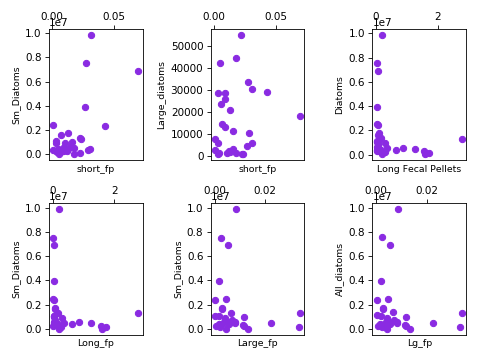

In [57]:
#Data exploration, plotting flux variables against each other to see if any types of 
#cells seem to be correlated with a certain type of particle.
plt.figure()

plt.subplot(2,3,1)
plt.plot(short_fp,Sm_Diatoms,'o',color='blueviolet')
plt.xlabel('short_fp',fontsize=9)
plt.ylabel('Sm_Diatoms',fontsize=9)


plt.subplot(2,3,2)
plt.plot(short_fp,Lg_diatoms,'o',color='blueviolet')
plt.xlabel('short_fp',fontsize=9)
plt.ylabel('Large_diatoms',fontsize=9)


plt.subplot(2,3,3)
plt.plot(Long_fp,Diatoms,'o',color='blueviolet')
plt.xlabel('Long Fecal Pellets',fontsize=9)
plt.ylabel('Diatoms',fontsize=9)


plt.subplot(2,3,4)
plt.plot(Long_fp,Sm_Diatoms,'o',color='blueviolet')
plt.xlabel('Long_fp',fontsize=9)
plt.ylabel('Sm_Diatoms',fontsize=9)


plt.subplot(2,3,5)
plt.plot(Lg_fp,Sm_Diatoms,'o',color='blueviolet')
plt.xlabel('Large_fp',fontsize=9)
plt.ylabel('Sm_Diatoms',fontsize=9)


plt.subplot(2,3,6)
plt.plot(Lg_fp,Diatoms,'o',color='blueviolet')
plt.xlabel('Lg_fp',fontsize=9)
plt.ylabel('All_diatoms',fontsize=9)


plt.tight_layout()

In [ ]:
pca = PCA() 
particle_PCA = pca.fit(df_norm_transformed).transform(df_norm_transformed)
particle_PCA_vectors = pca.fit(df_norm_transformed)
particle_PCA_vectors.components_[0]
components=list(df_norm_transformed)
plt.figure() 

for x in np.arange(0,30): 
    plt.plot(particle_PCA[x,0],particle_PCA[x,1],color='navy',lw=0,ms=5,marker='o')
for x in np.arange(0,13): 
    plt.arrow(0,0,particle_PCA_vectors.components_[0][x],particle_PCA_vectors.components_[1][x],color='grey') 
    plt.text(particle_PCA_vectors.components_[0][x],particle_PCA_vectors.components_[1][x],components[x],color='grey',fontsize=8)
    

##### Interpretation of Variable Plotting and PCA

    This data is weak for a fully reliable PCA for several reasons: Samples are less than
    31, variables are not normally distributed (count data)

    The motivation here was to use PCA analysis to identify patterns in data, namely to 
    detect correlation between variables. Results: Variables are niether positively nor
    negatively correlated. The only compelling connection from data visualized this way 
    is that when Diatoms are present, Long fecal pellets are absent, and visa versa.
    It's possible that long fecal pellets are a transport mechanism for diatoms and that
    this presence/absence relationship is support for the theory that solo cells have 
    been packaged into larger particles (ie: long fecal pellets) and subsequently 
    disaggregated.

# Data exploration and interpretations continued in Jupyter Notebook: 

## 'Jupy2_Solo_Sinking_Cells'

### Partial List of References:
    For full list see 'Jupy2_Solo_Sinking_Cells'

#### Alldredge, A. L. and M. W. Silver. 1988. "Characteristics, dynamics and significance of marine snow." Progress in Oceanography. 20:41-82.

#### Ducklow, Hugh, et al. 2001. “Upper Ocean Carbon Export and the Biological Pump” Oceanography, vol. 14, no. 4, , pp. 50–58.

#### Durkin, Colleen A., et al. 2015. “Observations of Carbon Export by Small Sinking Particles in the Upper Mesopelagic.” Marine Chemistry, vol. 175, , pp. 72–81.

#### Eppley, Richard W., and Bruce J. Peterson. 1979 “Particulate Organic Matter Flux and                             Planktonic New Production in the Deep Ocean.” Nature, vol. 282, no. 5740, , pp. 677–680.

#### Kiørboe, Thomas. 2001. “Formation and Fate of Marine Snow: Small-Scale Processes with Large- Scale Implications.” Scientia Marina, vol. 65, no. S2, , pp. 57–71. 

#### Martin, J. H., Knauer, G. A., Karl, D. M. & Broenkow, W. W. 1987. "VERTEX: carbon cycling in the northeast Pacific." Deep-Sea Res. 34, 267–285. 

#### Siegel, D. A. et al. 2016. "Prediction of the export and fate of global ocean net primary production: the EXPORTS science plan." Front. Mar. Sci. 3, 22.

#### Wiedmann, Ingrid, et al. 2014. “Potential Drivers of Sinking Particle's Size Spectra and Vertical Flux of Particulate Organic Carbon (POC): Turbulence, Phytoplankton, and Zooplankton.” Journal of Geophysical Research: Oceans, vol. 119, no. 10, pp. 6900–6917.

#### Volk, T., and Hoffert, M. I., 1985, Ocean carbon pumps: Analysis of relative strengths and efficiencies in ocean-driven atmospheric CO2 changes, In: “The Carbon Cycle and Atmospheric CO2: Natural Variations Archean to Present,” E. Sundquist and W. S. Broecker, eds., Geophysical Monograph 32, American Geophysical Union.
